In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 


### Reading the database from excel and seeing at the data

In [7]:
veh = pd.read_csv(r'C:\Users\Akash Barwad\Documents\AIML\documents\Project Data\Project-5 - Unsupervised Learning\vehicle-1.csv')

In [8]:
vehtry = pd.read_csv(r'C:\Users\Akash Barwad\Documents\AIML\documents\Project Data\Project-5 - Unsupervised Learning\vehicle-1.csv')

In [9]:
veh.head(30)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,car
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
5,107.0,NaN,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus
6,97.0,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204.0,bus
7,90.0,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146.0,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202.0,van
8,86.0,34.0,62.0,140.0,61.0,7.0,122.0,54.0,17.0,127.0,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208.0,van
9,93.0,44.0,98.0,NaN,62.0,11.0,183.0,36.0,22.0,146.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204.0,car


In [96]:
veh.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### Understanding the shape and size of the database

In [97]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_rat

In [66]:
for feature in veh.columns: # Loop through all columns in the dataframe
    if veh[feature].dtype == 'object': # Only apply for columns with categorical strings
        veh[feature] = pd.Categorical(veh[feature]).codes # Replace strings with an integer

In [67]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_rat

In [98]:
veh.isnull().values.any()

True

### From the above data we assume that the there are null values present in the database also, there are object datatypes which we have taken care of in by changinfg them to integer value.

In [99]:
veh.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [100]:
veh.shape

(847, 19)

In [101]:
veh.size

16093

C:\Users\Akash Barwad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Akash Barwad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


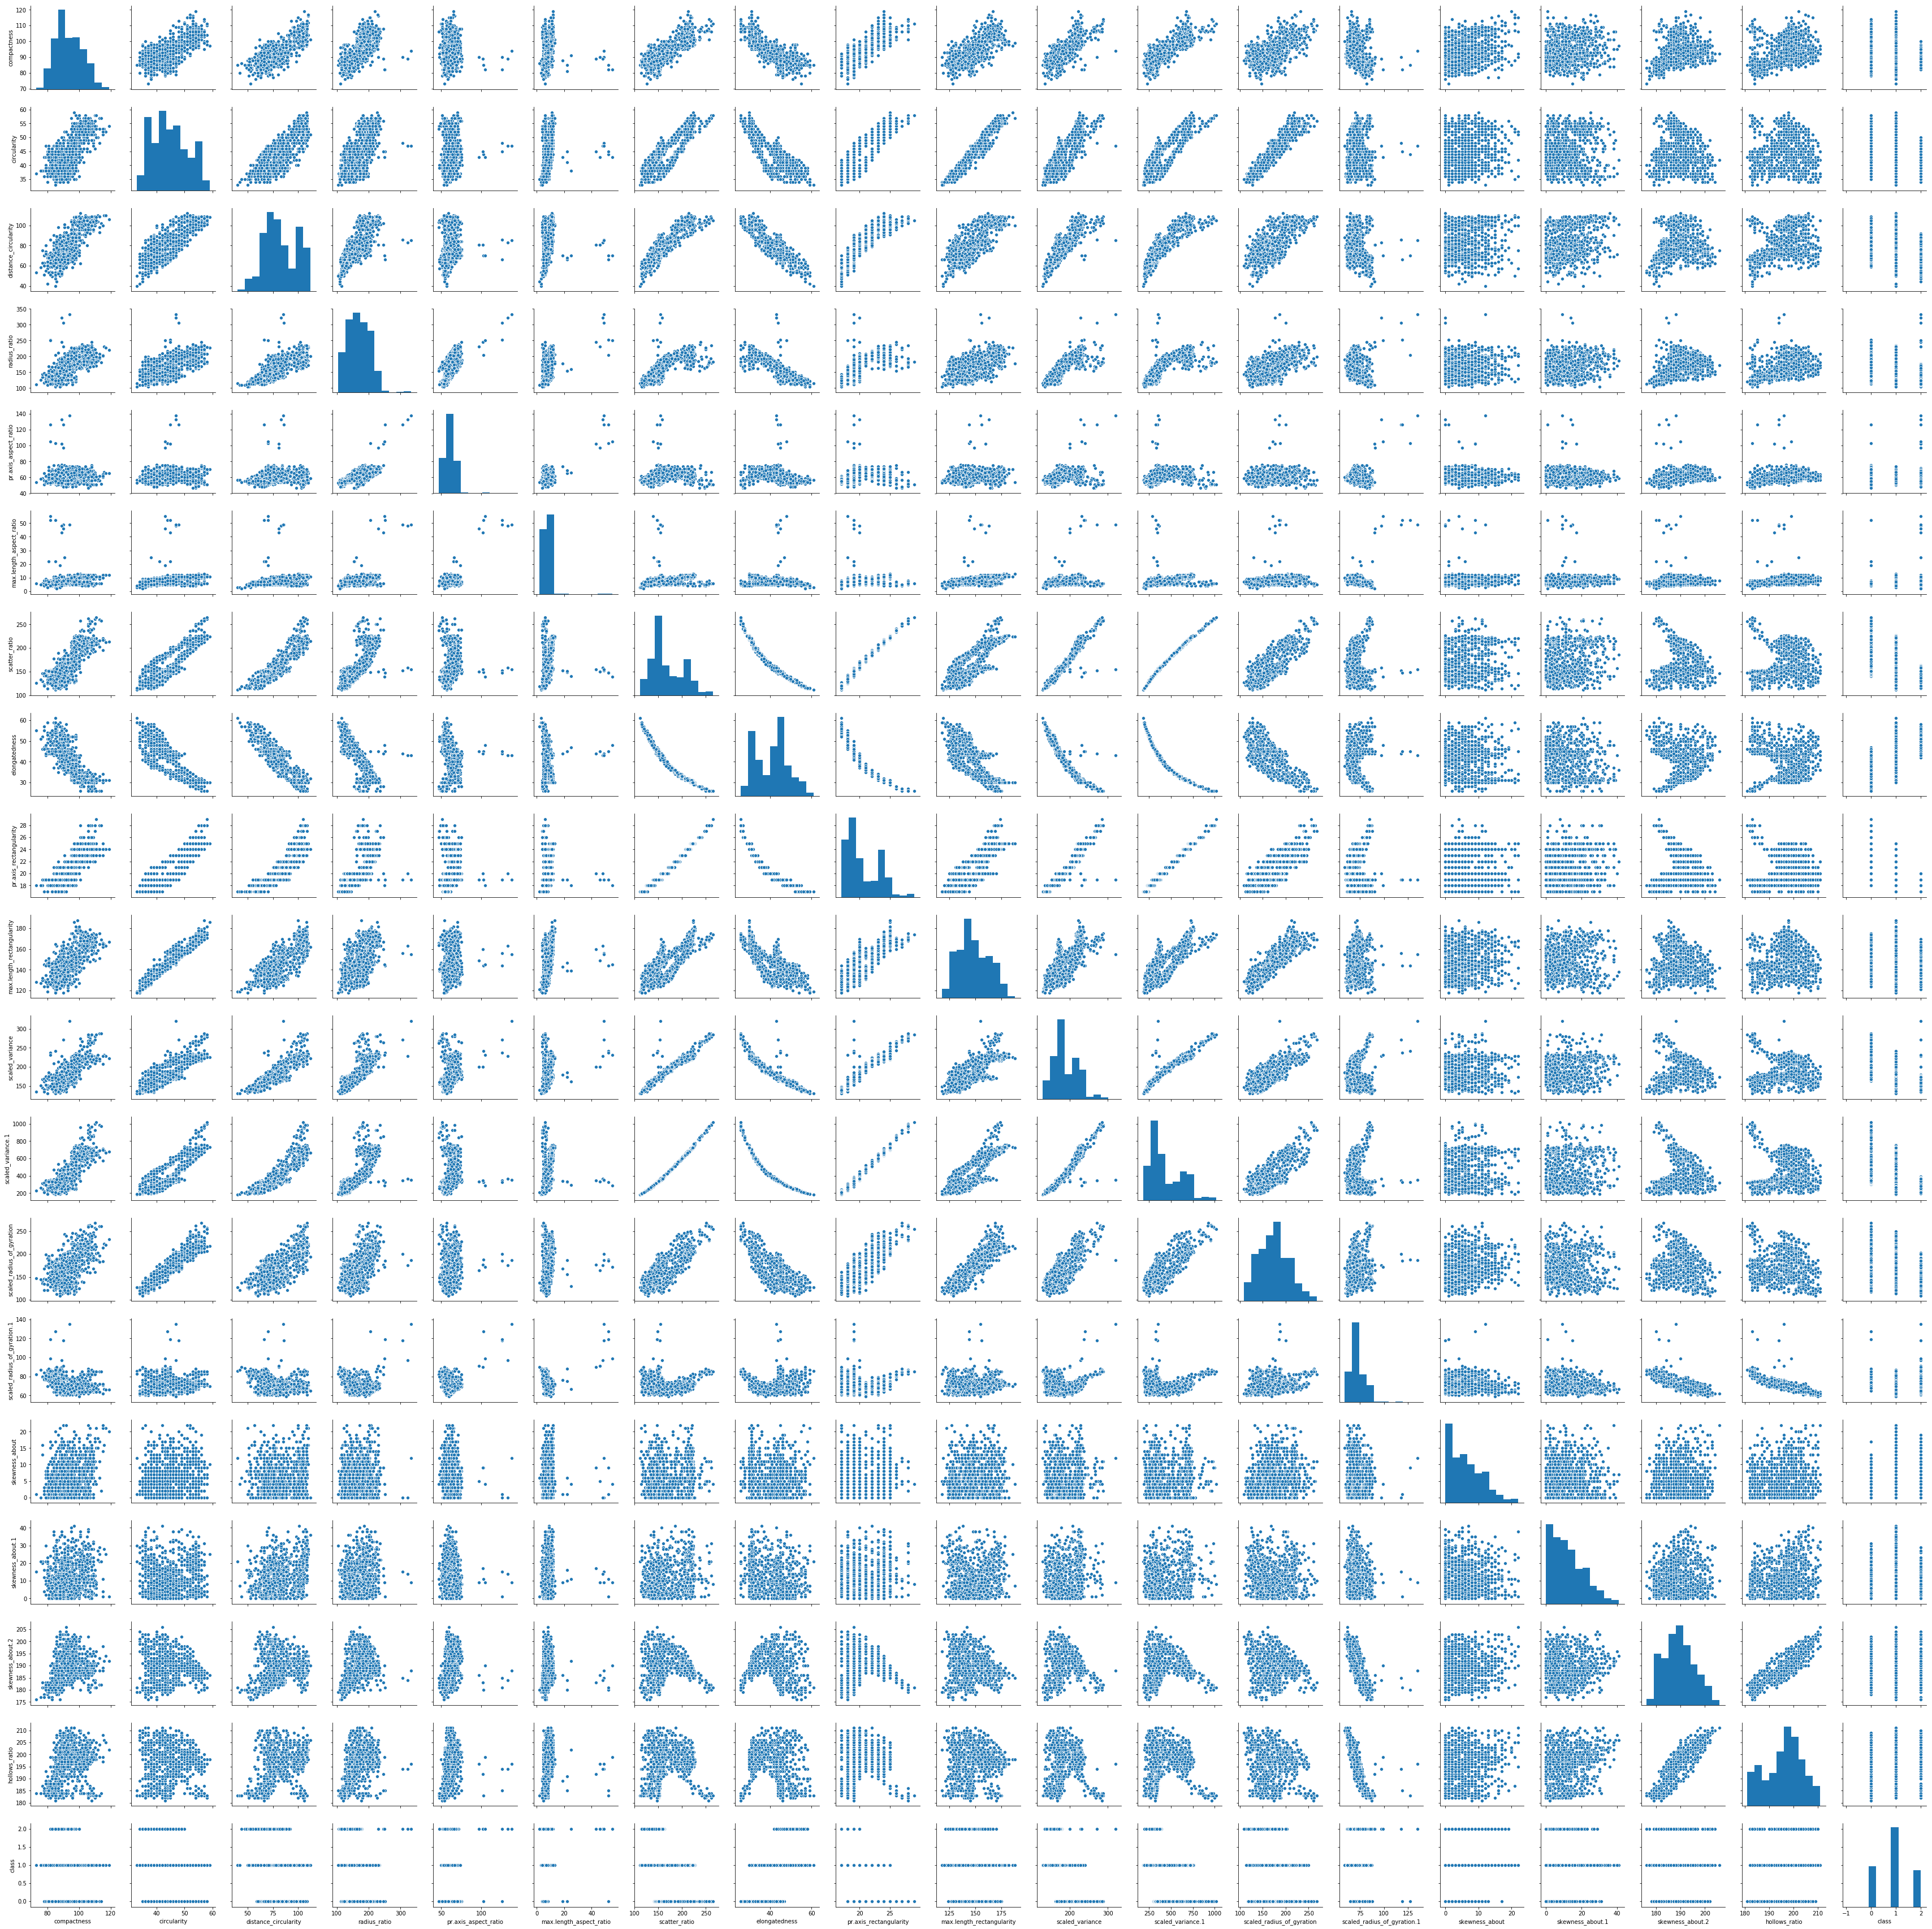

In [14]:
sns.pairplot(veh)

In [72]:
veh.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### With .describe function we identified that there is presence of outliers. we also checked the same visually with the help of pair plot. now we will see the number of outliers and how they are spread across the database.

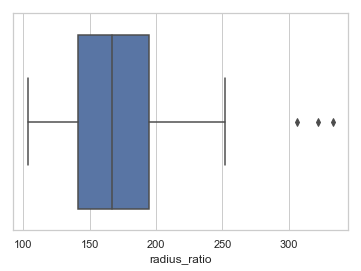

In [73]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=veh['radius_ratio'],whis=1.5)

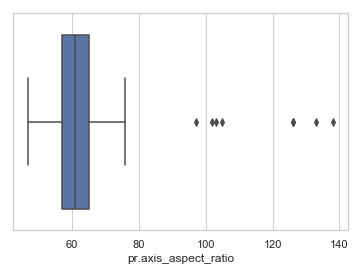

In [74]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=veh['pr.axis_aspect_ratio'],whis=1.5)

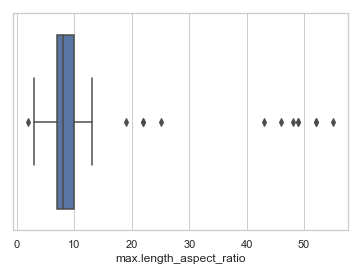

In [75]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=veh['max.length_aspect_ratio'],whis=1.5)

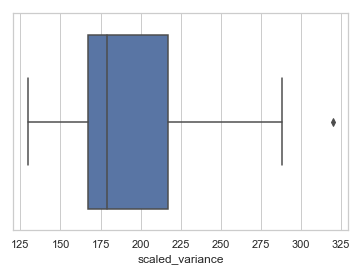

In [76]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=veh['scaled_variance'],whis=1.5)

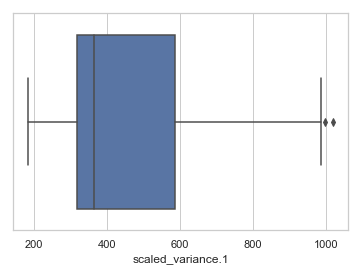

In [20]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=veh['scaled_variance.1'],whis=1.5)

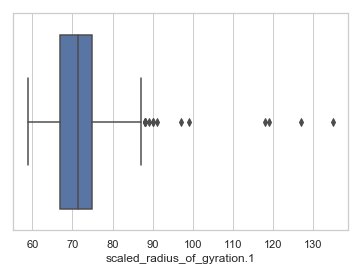

In [102]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=veh['scaled_radius_of_gyration.1'],whis=1.5)

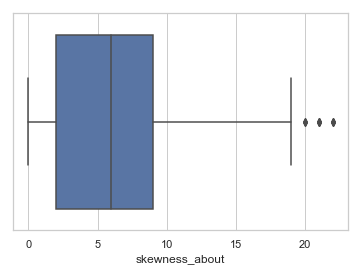

In [103]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=veh['skewness_about'],whis=1.5)

### Visually also it is confirmed that the outliers are present in the database.

In [10]:
veh.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
dtype: float64

### We will go for the co relation between all the columns also visually with heatmap.

In [81]:
cor = veh[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class']].corr()

cor

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,-0.788736,0.814248,0.676143,0.764361,0.818674,0.585845,-0.250603,0.236685,0.157670,0.298528,0.365552,-0.033796
circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,-0.827246,0.856603,0.965729,0.806791,0.850863,0.935950,0.053080,0.144968,-0.011869,-0.106339,0.045652,-0.160546
distance_circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,-0.913020,0.896273,0.775149,0.865710,0.890541,0.706950,-0.227001,0.114665,0.266049,0.146027,0.333648,-0.065209
radius_ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,-0.792946,0.712744,0.571083,0.798294,0.725598,0.541325,-0.181520,0.049112,0.174469,0.382912,0.472339,-0.182921
pr.axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,-0.183492,0.079566,0.127322,0.273738,0.089750,0.122454,0.152860,-0.058539,-0.032180,0.240201,0.267760,-0.098431
max.length_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,-0.180053,0.161603,0.305943,0.319033,0.143745,0.189752,0.295638,0.015446,0.043491,-0.026184,0.143919,0.207619
scatter_ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,-0.973504,0.992078,0.810017,0.951672,0.996328,0.800577,-0.028006,0.074376,0.213512,0.005171,0.118504,-0.288904
elongatedness,-0.788736,-0.827246,-0.913020,-0.792946,-0.183492,-0.180053,-0.973504,1.000000,-0.950405,-0.776150,-0.938313,-0.956488,-0.766671,0.103535,-0.052243,-0.186027,-0.114846,-0.216769,0.339348
pr.axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,-0.950405,1.000000,0.813135,0.938182,0.992316,0.798522,-0.015711,0.083219,0.215200,-0.019066,0.099481,-0.259102
max.length_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,-0.776150,0.813135,1.000000,0.746657,0.797485,0.866554,0.041283,0.136077,0.001660,-0.104437,0.076770,-0.032399


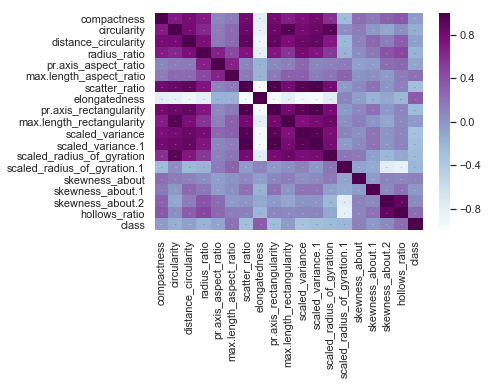

In [29]:
sns.heatmap(cor,annot=True,annot_kws={"size": 1.0},cmap='BuPu',vmin=-1,vmax=1)

### I found this code online to check the presence of outliers and see the exact positions where the outliers are present so tried the same and replaced them with mean values.

In [107]:
train = veh

null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()

compactness                    1
circularity                    6
distance_circularity           5
radius_ratio                   7
pr.axis_aspect_ratio           3
max.length_aspect_ratio        1
scatter_ratio                  2
elongatedness                  2
pr.axis_rectangularity         4
max.length_rectangularity      1
scaled_variance                4
scaled_variance.1              3
scaled_radius_of_gyration      3
scaled_radius_of_gyration.1    5
skewness_about                 7
skewness_about.1               2
skewness_about.2               2
hollows_ratio                  1
class                          1
dtype: int64

In [108]:
print(train[train.isnull().any(axis=1)][null_columns].head())

    compactness  circularity  distance_circularity  radius_ratio  \
5         107.0          NaN                 106.0         172.0   
9          93.0         44.0                  98.0           NaN   
19        101.0         56.0                 100.0         215.0   
35        100.0         46.0                   NaN         172.0   
66         81.0         43.0                  68.0         125.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                   50.0                      6.0          255.0   
9                   62.0                     11.0          183.0   
19                   NaN                     10.0          208.0   
35                  67.0                      9.0          157.0   
66                  57.0                      8.0          149.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5            26.0                    28.0                      169.0   
9            36.0                    2

In [111]:
veh1=veh.fillna(veh.mean())

In [112]:
train = veh1

null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()

class    1
dtype: int64

In [128]:
print(train[train.isnull().any(axis=1)][null_columns].head())

    class
846   NaN


In [129]:
veh1=veh1.dropna()

In [134]:
veh.shape

(847, 19)

In [135]:
veh1.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.000000,83.0,178.000000,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.000000,84.0,141.000000,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.000000,106.0,209.000000,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,car
3,93.0,41.000000,82.0,159.000000,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.000000,70.0,205.000000,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
5,107.0,44.828775,106.0,172.000000,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus
6,97.0,43.000000,73.0,173.000000,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204.0,bus
7,90.0,43.000000,66.0,157.000000,65.0,9.0,137.0,48.0,18.0,146.0,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202.0,van
8,86.0,34.000000,62.0,140.000000,61.0,7.0,122.0,54.0,17.0,127.0,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208.0,van
9,93.0,44.000000,98.0,168.888095,62.0,11.0,183.0,36.0,22.0,146.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204.0,car


### We found out that there are 1-10 number of outliers present in database so we thought to remove them and same has been done with the help of IQR technique. Kindly confirm if this is a good idea in this case or not.

In [136]:
Q1 = veh.quantile(0.25)
Q3 = veh.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              269.00
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [137]:
print(veh1 < (Q1 - 1.5 * IQR)) 
(veh1 > (Q3 + 1.5 * IQR))

     circularity  class  compactness  distance_circularity  elongatedness  \
0          False  False        False                 False          False   
1          False  False        False                 False          False   
2          False  False        False                 False          False   
3          False  False        False                 False          False   
4          False  False        False                 False          False   
5          False  False        False                 False          False   
6          False  False        False                 False          False   
7          False  False        False                 False          False   
8          False  False        False                 False          False   
9          False  False        False                 False          False   
10         False  False        False                 False          False   
11         False  False        False                 False          False   

,circularity,class,compactness,distance_circularity,elongatedness,hollows_ratio,max.length_aspect_ratio,max.length_rectangularity,pr.axis_aspect_ratio,pr.axis_rectangularity,radius_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,scaled_variance,scaled_variance.1,scatter_ratio,skewness_about,skewness_about.1,skewness_about.2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
veh1_out = veh1[~((veh < (Q1 - 1.5 * IQR)) |(veh1 > (Q3 + 1.5 * IQR))).any(axis=1)]
veh1_out.shape

C:\Users\Akash Barwad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(813, 19)

In [159]:
veh2=veh1_out
veh2.shape

(813, 19)

In [140]:
veh1.shape

(846, 19)

### PCA part starts from here

In [160]:
X = veh2.iloc[:,0:17].values
y = veh2.iloc[:,18].values
from sklearn.preprocessing import StandardScaler

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [162]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [163]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00176056  0.67303392  0.79719405  0.73128119  0.14226364  0.4897036
   0.81465354 -0.79265308  0.81656737  0.67471764  0.79852657  0.82081443
   0.58457404 -0.22514708  0.20633538  0.1376959   0.28394189]
 [ 0.67303392  1.00176056  0.79669218  0.6273473   0.15330433  0.56075265
   0.84708563 -0.81675129  0.84343605  0.96151887  0.80216833  0.83752265
   0.92804391  0.0902563   0.16192697 -0.00591522 -0.14006059]
 [ 0.79719405  0.79669218  1.00176056  0.80121117  0.20216171  0.66252609
   0.91277666 -0.91517946  0.90056848  0.78322186  0.88794423  0.89737534
   0.71146759 -0.20436425  0.11929571  0.24828495  0.11139934]
 [ 0.73128119  0.6273473   0.80121117  1.00176056  0.64795189  0.4625814
   0.77366716 -0.8352769   0.74652657  0.56538905  0.77419265  0.76197567
   0.53703184 -0.39555464  0.0393724   0.14745539  0.41265989]
 [ 0.14226364  0.15330433  0.20216171  0.64795189  1.00176056  0.12795773
   0.14163715 -0.25369252  0.10942912  0.08996209  0.15394392 

In [165]:

tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 56.98784364  72.14617179  79.1895656   85.90311813  90.97870149
  94.82595939  96.69200907  97.97131241  98.56030401  98.9956137
  99.34402893  99.55369131  99.71212723  99.84008043  99.94898962
  99.99803245 100.        ]


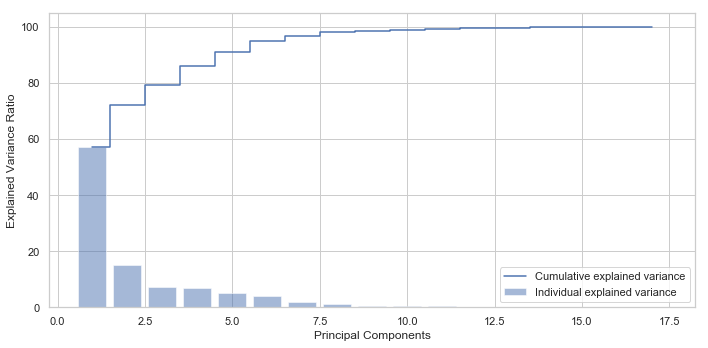

In [166]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [175]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:7]

[(9.70498963897293,
  array([-0.27133407, -0.28945307, -0.30307843, -0.2637063 , -0.0737773 ,
         -0.1912342 , -0.3140593 ,  0.31031268, -0.3112024 , -0.28159247,
         -0.30570872, -0.31132088, -0.26901613,  0.02064049, -0.04359731,
         -0.05303837, -0.01507043])),
 (2.5814526100817123,
  array([ 0.12020675, -0.13233556,  0.06951168,  0.29196898,  0.36793817,
          0.09683871, -0.05542042, -0.01982989, -0.06971071, -0.13467973,
         -0.04775366, -0.06025373, -0.2166825 , -0.56652297,  0.00889044,
          0.0711268 ,  0.57253142])),
 (1.1994850051042234,
  array([ 0.04721542,  0.18829767, -0.05166701, -0.06675248,  0.00229725,
          0.16085171, -0.10220196,  0.09583215, -0.09592375,  0.20071566,
         -0.1416852 , -0.10335924,  0.18186462, -0.11152814,  0.61468109,
         -0.63233697,  0.07899117])),
 (1.1433132684759448,
  array([ 0.15686943, -0.08619287,  0.11098454, -0.20907743, -0.5677167 ,
          0.22955897,  0.00748961,  0.05411731,  0.03045795,

In [178]:
w = np.hstack((eigen_pairs[0][1].reshape(17,1), 
                      eigen_pairs[1][1].reshape(17,1)))
print('Matrix W:\n', w)
X_pca = X_train.dot(w)

Matrix W:
 [[-0.27133407  0.12020675]
 [-0.28945307 -0.13233556]
 [-0.30307843  0.06951168]
 [-0.2637063   0.29196898]
 [-0.0737773   0.36793817]
 [-0.1912342   0.09683871]
 [-0.3140593  -0.05542042]
 [ 0.31031268 -0.01982989]
 [-0.3112024  -0.06971071]
 [-0.28159247 -0.13467973]
 [-0.30570872 -0.04775366]
 [-0.31132088 -0.06025373]
 [-0.26901613 -0.2166825 ]
 [ 0.02064049 -0.56652297]
 [-0.04359731  0.00889044]
 [-0.05303837  0.0711268 ]
 [-0.01507043  0.57253142]]


In [180]:
X_train.shape, w.shape, X_pca.shape

((569, 17), (17, 2), (569, 2))

In [181]:
X_pca

array([[-3.17335885, -0.65924239],
       [-1.61895414,  0.70052913],
       [ 5.05334739, -1.95490136],
       ...,
       [ 0.08009224,  0.78708036],
       [ 2.45561652,  1.15162265],
       [ 1.71599444,  2.68719083]])

### Confirmed the code with SVM.

In [182]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [183]:
clf = SVC()
clf.fit(X_train, y_train)
print ('score', clf.score(X_test, y_test))

score 0.9672131147540983
